## Lung cancer data analysis - Kun Yao

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("sclc_ucologne_2015_clinical_data.tsv", sep='\t')

In [3]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Chemotherapy,Ethnicity Category,Gene Panel,Metastatic Site,...,Number of Samples Per Patient,Sample Type,Sex,Smoker,Smoking History,Somatic Status,Specimen Preservation Type,TMB (nonsynonymous),T Stage,UICC Tumor Stage
0,sclc_ucologne_2015,sclc_ucologne_2015_S00022,sclc_ucologne_2015_S00022,47.0,Small Cell Lung Cancer,Small Cell Lung Cancer,Yes,NaN,WGS,NaN,...,1,Primary,Male,Current,NaN,Matched,FF Tissue,6.066667,1,IIIa
1,sclc_ucologne_2015,sclc_ucologne_2015_S00035,sclc_ucologne_2015_S00035,65.0,Small Cell Lung Cancer,Small Cell Lung Cancer,Yes,NaN,WGS,NaN,...,1,Primary,Female,Former,NaN,Matched,FF Tissue,7.733333,3,IV
2,sclc_ucologne_2015,sclc_ucologne_2015_S00050,sclc_ucologne_2015_S00050,47.0,Small Cell Lung Cancer,Small Cell Lung Cancer,Yes,NaN,WGS,NaN,...,1,Primary,Male,Current,NaN,Matched,FF Tissue,10.600000,1,Ia
3,sclc_ucologne_2015,sclc_ucologne_2015_S00213,sclc_ucologne_2015_S00213,65.0,Small Cell Lung Cancer,Small Cell Lung Cancer,NaN,NaN,RNA-seq,NaN,...,1,Primary,Male,NaN,NaN,Unmatched,FF Tissue,0.000000,1,IIIa
4,sclc_ucologne_2015,sclc_ucologne_2015_S00339,sclc_ucologne_2015_S00339,61.0,Small Cell Lung Cancer,Small Cell Lung Cancer,NaN,NaN,WGS,NaN,...,1,Primary,Male,NaN,NaN,Matched,FF Tissue,2.933333,2,IIIa


In [8]:
df.describe()

,Diagnosis Age,Mutation Count,Overall Survival (Months),Progress Free Survival (Months),Number of Samples Per Patient,TMB (nonsynonymous)
count,119.000000,110.000000,110.000000,42.000000,120.0,120.000000
mean,64.974790,268.336364,30.254545,18.642857,1.0,8.195556
std,9.091309,140.763141,29.947488,18.916790,0.0,5.129801
min,33.000000,35.000000,0.000000,0.000000,1.0,0.000000
25%,59.000000,183.250000,10.000000,7.000000,1.0,5.016667
50%,65.000000,234.000000,21.500000,11.500000,1.0,7.533333
75%,71.000000,350.000000,41.250000,22.750000,1.0,11.241667
max,83.000000,734.000000,164.000000,93.000000,1.0,24.433333


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Study ID                                                        120 non-null    object 
 1   Patient ID                                                      120 non-null    object 
 2   Sample ID                                                       120 non-null    object 
 3   Diagnosis Age                                                   119 non-null    float64
 4   Cancer Type                                                     120 non-null    object 
 5   Cancer Type Detailed                                            120 non-null    object 
 6   Chemotherapy                                                    95 non-null     object 
 7   Ethnicity Category                                   

In [10]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age', 'Cancer Type',
       'Cancer Type Detailed', 'Chemotherapy', 'Ethnicity Category',
       'Gene Panel', 'Metastatic Site',
       'First Pathologic Diagnosis Biospecimen Acquisition Method Type',
       'Mutation Count', 'M Stage', 'Neoadjuvant Chemotherapy', 'N Stage',
       'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status',
       'Progress Free Survival (Months)', 'Previous Treatment',
       'Radiation Therapy', 'Number of Samples Per Patient', 'Sample Type',
       'Sex', 'Smoker', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'TMB (nonsynonymous)', 'T Stage',
       'UICC Tumor Stage'],
      dtype='object')

In [4]:
df.groupby('Sex').count()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Chemotherapy,Ethnicity Category,Gene Panel,Metastatic Site,...,Radiation Therapy,Number of Samples Per Patient,Sample Type,Smoker,Smoking History,Somatic Status,Specimen Preservation Type,TMB (nonsynonymous),T Stage,UICC Tumor Stage
Sex,,,,,,,,,,,,,,,,,,,,,
Female,44,44,44,44,44,44,35,21,44,2,...,35,44,44,38,28,44,44,44,39,43
Male,76,76,76,75,76,76,60,45,76,1,...,56,76,76,68,46,76,76,76,69,75


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

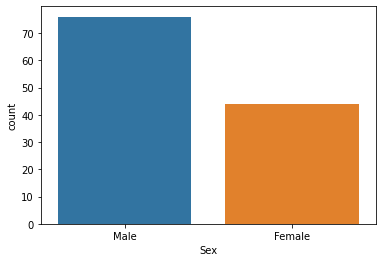

In [7]:
sns.countplot(df['Sex'])

In [12]:
df['Smoking History'].count()

74

In [11]:
df.groupby('Sex')['Smoking History'].count()

Sex
Female    28
Male      46
Name: Smoking History, dtype: int64

In [14]:
rate = df['Smoking History'].count()/df['Sex'].count()
print(rate)
rate_man = 46 / 74
print(rate_man)
rate_woman = 28 / 74
print(rate_woman)

0.6166666666666667
0.6216216216216216
0.3783783783783784


### Among all the 120 patients, 74 patients smoke, which takes up 61.67%. Among the 74 people, 62.16% male patients smoke and 37.83% female patients smoke. Therefore, we can draw the conclusion that smoking is one of the most important factors which leads to lung cancer.

In [17]:
df.groupby('Diagnosis Age')['Diagnosis Age'].count()

Diagnosis Age
33.0    1
44.0    1
46.0    1
47.0    3
48.0    1
51.0    2
52.0    1
53.0    3
54.0    1
55.0    2
56.0    1
57.0    5
58.0    6
59.0    3
60.0    2
61.0    6
62.0    3
63.0    8
64.0    6
65.0    4
66.0    5
67.0    5
68.0    6
69.0    3
70.0    9
71.0    5
72.0    2
73.0    3
74.0    3
75.0    3
76.0    5
77.0    2
78.0    2
80.0    1
81.0    1
82.0    1
83.0    3
Name: Diagnosis Age, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '33.0'),
  Text(1, 0, '44.0'),
  Text(2, 0, '46.0'),
  Text(3, 0, '47.0'),
  Text(4, 0, '48.0'),
  Text(5, 0, '51.0'),
  Text(6, 0, '52.0'),
  Text(7, 0, '53.0'),
  Text(8, 0, '54.0'),
  Text(9, 0, '55.0'),
  Text(10, 0, '56.0'),
  Text(11, 0, '57.0'),
  Text(12, 0, '58.0'),
  Text(13, 0, '59.0'),
  Text(14, 0, '60.0'),
  Text(15, 0, '61.0'),
  Text(16, 0, '62.0'),
  Text(17, 0, '63.0'),
  Text(18, 0, '64.0'),
  Text(19, 0, '65.0'),
  Text(20, 0, '66.0'),
  Text(21, 0, '67.0'),
  Text(22, 0, '68.0'),
  Text(23, 0, '69.0'),
  Text(24, 0, '70.0'),
  Text(25, 0, '71.0'),
  Text(26, 0, '72.0'),
  Text(27, 0, '73.0'),
  Text(28, 0, '74.0'),
  Text(29, 0, '75.0'),
  Text(30, 0, '76.0'),
  Text(31, 0, '77.0'),
  Text(32, 0, '78.0'),
  Text(33, 0, '80.0'),
  Text(34, 0, '81.0'),
  Text(35, 0, '82.0'),
  Text(3

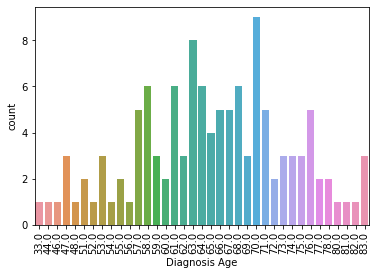

In [22]:
sns.countplot(df['Diagnosis Age'])
plt.xticks(rotation=90)

### Age ranging from 57 to 71 has higher possibility to get lung cancer.

In [33]:
df.groupby('Sex')['Diagnosis Age'].mean()

Sex
Female    63.886364
Male      65.613333
Name: Diagnosis Age, dtype: float64

In [36]:
df.groupby(['Sex', 'Overall Survival Status'])['Overall Survival Status'].count()

Sex     Overall Survival Status
Female  0:LIVING                   16
        1:DECEASED                 24
Male    0:LIVING                   20
        1:DECEASED                 51
Name: Overall Survival Status, dtype: int64

In [40]:
df.groupby(['Sex', 'Radiation Therapy'])['Overall Survival Status'].count()

Sex     Radiation Therapy
Female  No                   16
        Yes                  18
Male    No                   30
        Yes                  26
Name: Overall Survival Status, dtype: int64

In [41]:
df.groupby(['Overall Survival Status', 'Radiation Therapy'])['Overall Survival Status'].count()

Overall Survival Status  Radiation Therapy
0:LIVING                 No                   15
                         Yes                  18
1:DECEASED               No                   31
                         Yes                  26
Name: Overall Survival Status, dtype: int64

### As can be seen from the above analysis, female patients have higher chance to be cured if they get lung cancer. The radiation therapy does not seem to have much help in curing lung cancer.

In [45]:
df.groupby(['Sex', 'Gene Panel'])['Gene Panel'].count()

Sex     Gene Panel                               
Female  RNA-seq                                       1
        RNA-seq (Peifer et al., 2012; Ref.No. 2)      3
        WGS                                          38
        WGS (Peifer et al., 2012; Ref.No. 2)          1
        WGS (only T)                                  1
Male    RNA-seq                                       5
        RNA-seq (Seidel et al., 2013; Ref.No. 44)     1
        WGS                                          69
        WGS (Peifer et al., 2012; Ref.No. 2)          1
Name: Gene Panel, dtype: int64

In [46]:
df.groupby('Gene Panel')['Gene Panel'].count()

Gene Panel
RNA-seq                                        6
RNA-seq (Peifer et al., 2012; Ref.No. 2)       3
RNA-seq (Seidel et al., 2013; Ref.No. 44)      1
WGS                                          107
WGS (Peifer et al., 2012; Ref.No. 2)           2
WGS (only T)                                   1
Name: Gene Panel, dtype: int64

### Most patients have WGS gene panel.

In [47]:
df['Progress Free Survival (Months)'].mean()

18.642857142857142

### Patients survive around 18.6 more months after they get treatment.